In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
data=pd.read_csv('Churn_Modelling.csv')
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
data.shape

(10000, 14)

In [ ]:
X=data.iloc[:,:-1]
y=data.iloc[:,-1]

In [ ]:
y

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: int64

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [ ]:
X.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
dtype: int64

In [ ]:
#doing some data cleaning
X.drop(['CustomerId','Surname','RowNumber'],axis=1,inplace=True)

In [ ]:
X.tail()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
9995,771,France,Male,39,5,0.00,2,1,0,96270.64
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77
9997,709,France,Female,36,7,0.00,1,0,1,42085.58
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52
9999,792,France,Female,28,4,130142.79,1,1,0,38190.78


In [ ]:
#feature engineering (handling categorical data)
Gen = pd.get_dummies(X['Gender'],drop_first=True)
Geo = pd.get_dummies(X['Geography'],drop_first=True)

In [ ]:
#adding the featured columns
X=pd.concat([X,Gen,Geo],axis=1)
X

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Male,Germany,Spain
0,619,France,Female,42,2,0.00,1,1,1,101348.88,False,False,False
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,False,False,True
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,False,False,False
3,699,France,Female,39,1,0.00,2,0,0,93826.63,False,False,False
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,True,False,False
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,True,False,False
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,False,False,False
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,True,True,False


In [ ]:
X.drop(['Gender','Geography'],axis=1,inplace=True)
X

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Male,Germany,Spain
0,619,42,2,0.00,1,1,1,101348.88,False,False,False
1,608,41,1,83807.86,1,0,1,112542.58,False,False,True
2,502,42,8,159660.80,3,1,0,113931.57,False,False,False
3,699,39,1,0.00,2,0,0,93826.63,False,False,False
4,850,43,2,125510.82,1,1,1,79084.10,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,True,False,False
9996,516,35,10,57369.61,1,1,1,101699.77,True,False,False
9997,709,36,7,0.00,1,0,1,42085.58,False,False,False
9998,772,42,3,75075.31,2,1,0,92888.52,True,True,False


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
X_train.shape

(8000, 11)

In [ ]:
#feature scaling
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [ ]:
X_train

array([[ 0.35649971, -0.6557859 ,  0.34567966, ...,  0.91324755,
        -0.57946723, -0.57638802],
       [-0.20389777,  0.29493847, -0.3483691 , ...,  0.91324755,
         1.72572313, -0.57638802],
       [-0.96147213, -1.41636539, -0.69539349, ...,  0.91324755,
        -0.57946723,  1.73494238],
       ...,
       [ 0.86500853, -0.08535128, -1.38944225, ..., -1.09499335,
        -0.57946723, -0.57638802],
       [ 0.15932282,  0.3900109 ,  1.03972843, ...,  0.91324755,
        -0.57946723, -0.57638802],
       [ 0.47065475,  1.15059039, -1.38944225, ...,  0.91324755,
         1.72572313, -0.57638802]])

In [ ]:
from keras.models import Sequential
from keras.layers import Dense,Dropout
import tensorflow as tf

In [ ]:
clf=Sequential()

In [ ]:
#Adding the input layer
clf.add(Dense(units=12,activation='relu'))
clf.add(Dropout(0.3))

#two hidden layers
clf.add(Dense(units=7,activation='relu'))
clf.add(Dropout(0.3))

clf.add(Dense(units=7,activation='relu'))
clf.add(Dropout(0.3))

#Adding the output layer
clf.add(Dense(1,activation='sigmoid'))

In [ ]:
clf.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
from keras.callbacks import EarlyStopping,CSVLogger,ModelCheckpoint

early=EarlyStopping(monitor='val_loss',min_delta=0.01,patience=7,verbose=1,restore_best_weights=True)
model=ModelCheckpoint("ann.h5")

In [ ]:
hist = clf.fit(X_train,y_train,validation_split=0.3, validation_data=(X_test, y_test),batch_size=16,epochs=40,callbacks=[early,model])

Epoch 1/40
500/500 [==============================] - 5s 3ms/step - loss: 0.7113 - accuracy: 0.6771 - val_loss: 0.5096 - val_accuracy: 0.8035
Epoch 2/40
 82/500 [===>..........................] - ETA: 0s - loss: 0.5608 - accuracy: 0.7851

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


500/500 [==============================] - 1s 3ms/step - loss: 0.5319 - accuracy: 0.7903 - val_loss: 0.4827 - val_accuracy: 0.8035
Epoch 3/40
500/500 [==============================] - 1s 2ms/step - loss: 0.5081 - accuracy: 0.7934 - val_loss: 0.4627 - val_accuracy: 0.8035
Epoch 4/40
500/500 [==============================] - 1s 3ms/step - loss: 0.4913 - accuracy: 0.7952 - val_loss: 0.4389 - val_accuracy: 0.8040
Epoch 5/40
500/500 [==============================] - 2s 4ms/step - loss: 0.4736 - accuracy: 0.8029 - val_loss: 0.4195 - val_accuracy: 0.8100
Epoch 6/40
500/500 [==============================] - 1s 3ms/step - loss: 0.4617 - accuracy: 0.8085 - val_loss: 0.4117 - val_accuracy: 0.8110
Epoch 7/40
500/500 [==============================] - 1s 2ms/step - loss: 0.4543 - accuracy: 0.8096 - val_loss: 0.4070 - val_accuracy: 0.8105
Epoch 8/40
500/500 [==============================] - 1s 2ms/step - loss: 0.4432 - accuracy: 0.8165 - val_loss: 0.3988 - val_accuracy: 0.8200
Epoch 9/40
500/50

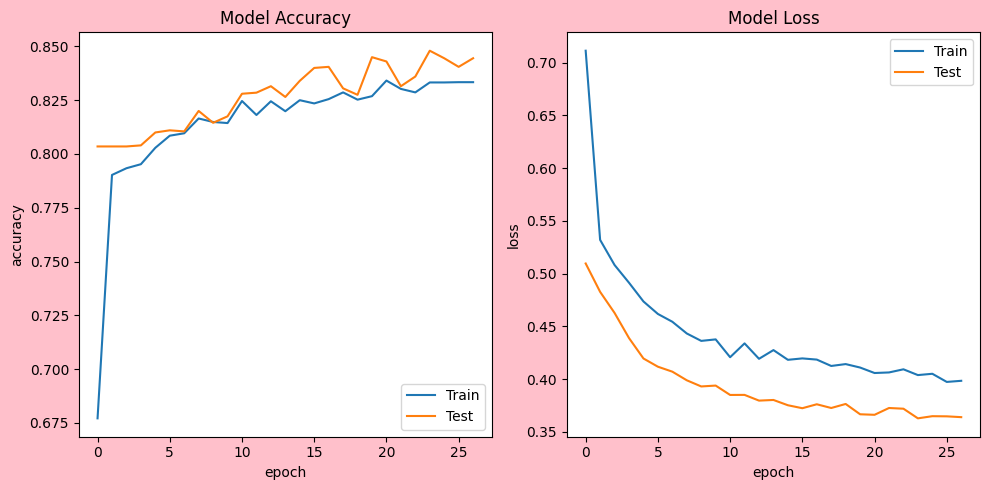

In [ ]:
plt.figure(figsize=(10,5),facecolor='pink') # width and height in inches
plt.subplot(1,2,1)
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train','Test'],loc='lower right')

plt.subplot(1,2,2)
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train','Test'],loc='upper right')

plt.tight_layout()
plt.show()

In [ ]:
y_pred=clf.predict(X_test)
y_pred=(y_pred>=0.5)

63/63 [==============================] - 1s 5ms/step


In [ ]:
from sklearn.metrics import confusion_matrix,accuracy_score
cf=confusion_matrix(y_pred,y_test)
acc=accuracy_score(y_pred,y_test)

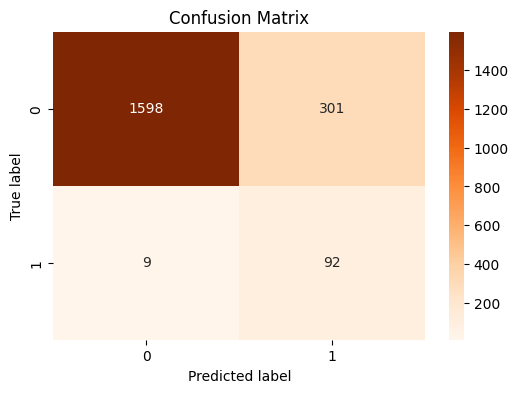

In [ ]:
import seaborn as sns
# Plotting with seaborn
plt.figure(figsize=(6, 4))
sns.heatmap(cf, annot=True, fmt="d", cmap="Oranges")
plt.title('Confusion Matrix')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [ ]:
acc

0.845

In [ ]:
clf.get_weights()

[array([[ 0.05820848,  0.10887222,  0.06718287, -0.06436346, -0.26342714,
          0.09272077, -0.01564498,  0.01388089,  0.21326204,  0.01789527,
         -0.05864965, -0.04897013],
        [ 0.4920288 ,  0.11355356,  0.15223886,  0.21904466, -0.14642292,
         -1.1470704 ,  0.1455817 , -0.5942207 , -0.83946943,  0.30733743,
          0.7236792 ,  0.26970643],
        [ 0.08805962,  0.05789893, -0.06724789, -0.04564641,  0.0876351 ,
         -0.06366946, -0.0370823 ,  0.03614228, -0.16368419,  0.04537608,
         -0.11264681, -0.01889227],
        [-0.22194888, -0.29636854, -0.5133489 , -0.31170082, -0.51386905,
         -0.45825282, -0.56228137, -0.30655795, -0.28800482, -0.36934003,
          0.2680147 ,  0.2088132 ],
        [-0.07691029, -0.4885084 , -0.6669086 , -0.49853286, -0.02290219,
         -0.03306142, -0.80357563, -0.02263695, -0.27154636, -0.7658522 ,
         -0.04176869,  0.9668404 ],
        [ 0.09999327, -0.02633743,  0.06327245, -0.11858882, -0.28434807,
      